In [90]:
#Import Dask

import dask
import cartopy.crs as ccrs
from dask.distributed import Client, progress
client = Client(dashboard_address=':5555')  # set up local cluster on your laptop
client

#Import other necessary modules! 

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

/Users/sunnysharma/opt/anaconda3/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 5555 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53498 instead
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [96]:
ds = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds633.1/2/TP',
                     chunks={'time':'500MB'})

variables = ['Total_column_water_vapour_surface_Mixed_intervals_Average',
        'Sea_surface_temperature_surface_Mixed_intervals_Average']
#select the two needed variables every 4th point to get 1 degree resolution
ds = ds[variables].sel(lat=slice(65, -65, 4), lon=slice(120, 300, 4))
print(ds.coords)




Coordinates:
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] dask.array<chunksize=(516,), meta=np.ndarray>


In [97]:
wv_mean = ds['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time')
sst_mean = ds['Sea_surface_temperature_surface_Mixed_intervals_Average'].mean(dim='time')

print(wv_mean)

<xarray.DataArray 'Total_column_water_vapour_surface_Mixed_intervals_Average' (
                                                                               lat: 130,
                                                                               lon: 181)>
dask.array<mean_agg-aggregate, shape=(130, 181), dtype=float32, chunksize=(130, 181), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0


In [115]:
ds_land_mask = xr.open_dataset('land_mask.nc')

rename_dict = {'latitude':'lat','longitude':'lon'}
ds_land_mask = ds_land_mask.rename(rename_dict)

ds_land_mask = ds_land_mask['LSM'].sel(lat=slice(65, -65), lon=slice(120, 300))

wv_mean_mask = wv_mean.where(sst_mean.notnull())



[[      nan       nan       nan ... 272.62512 272.7166  272.8225 ]
 [      nan       nan       nan ... 272.85986 273.0406  273.566  ]
 [      nan       nan       nan ... 273.17624 273.84332 274.68073]
 ...
 [272.72833 272.7276  272.7551  ... 272.98938 272.9934  272.8362 ]
 [272.47726 272.52246 272.54208 ... 272.65793 272.75934 272.22964]
 [272.11523 272.15164 272.1657  ... 272.13892 271.73517       nan]]


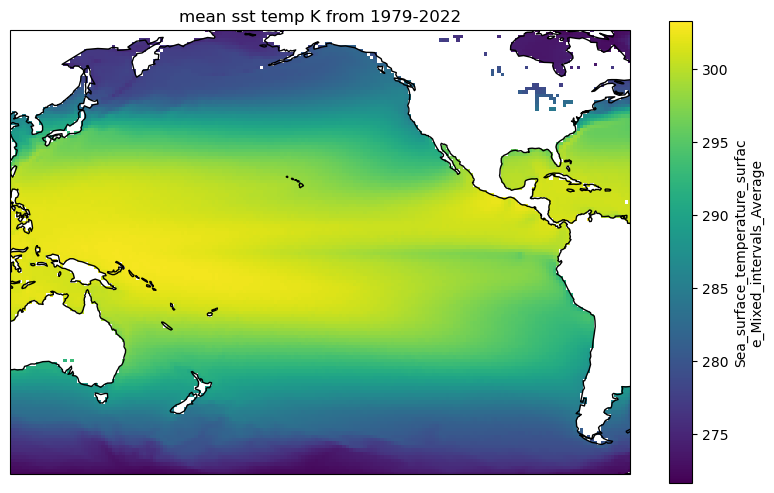

In [116]:
min_lat = -64.25
max_lat = 64.75 
min_lon = 120
max_lon = 300

projection = ccrs.PlateCarree(central_longitude=180)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
sst_mean.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('mean sst temp K from 1979-2022')
plt.show()


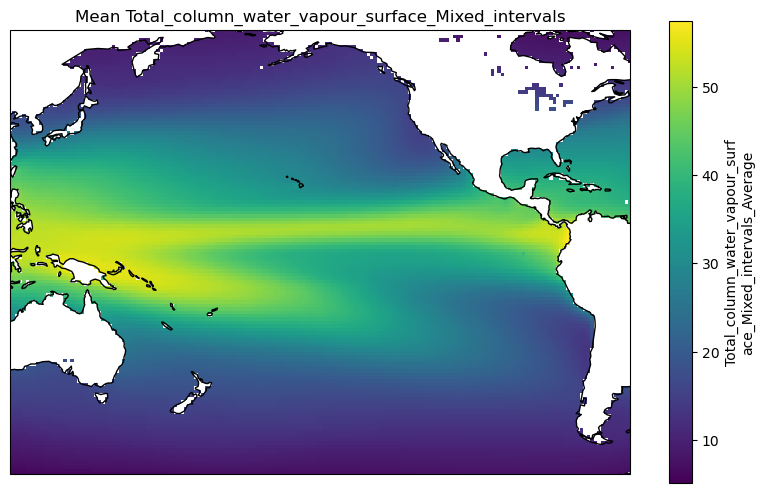

In [118]:
min_lat = -64.25
max_lat = 64.75 
min_lon = 120
max_lon = 300

projection = ccrs.PlateCarree(central_longitude=180)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
wv_mean_mask.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Mean Total_column_water_vapour_surface_Mixed_intervals')
plt.show()